In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table("Combined_Rg2.txt")

In [3]:
df.head()

,N
1.633607,10.0
1.720058,11.0
1.835707,12.0
1.988769,13.0
2.044194,14.0


In [4]:
df['Radius of Gyration'] = df.index

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.head(3)

,N,Radius of Gyration
0,10.0,1.633607
1,11.0,1.720058
2,12.0,1.835707


In [7]:
df =df.dropna(axis= 0)
df.head(3)

,N,Radius of Gyration
0,10.0,1.633607
1,11.0,1.720058
2,12.0,1.835707


In [8]:
from sklearn.model_selection import train_test_split

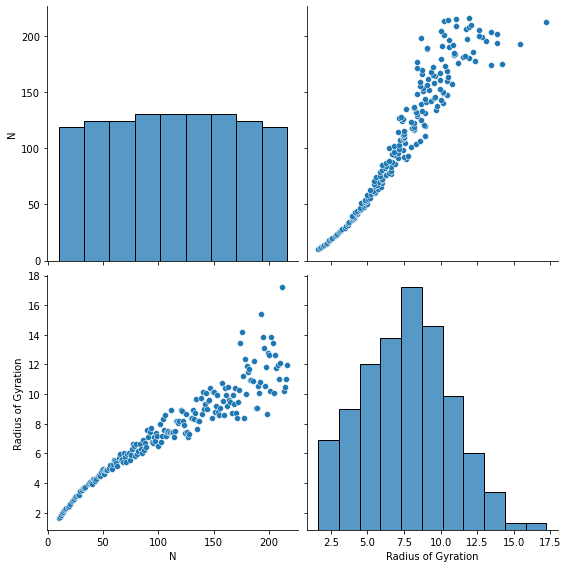

In [9]:
# plt.plot(figsize = (12,5))
sns.pairplot(df.iloc[:200], height=4)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['N'].values, df['Radius of Gyration'].values, test_size= 0.2,random_state=101 )

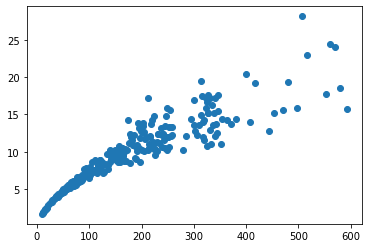

In [11]:
plt.scatter(X_train, y_train)

In [12]:
X_test = X_test.reshape(-1,1)
X_train = X_train.reshape(-1,1)

### Predicting Using Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
predictions = model.predict(X_test)

In [17]:
X_test.size

63

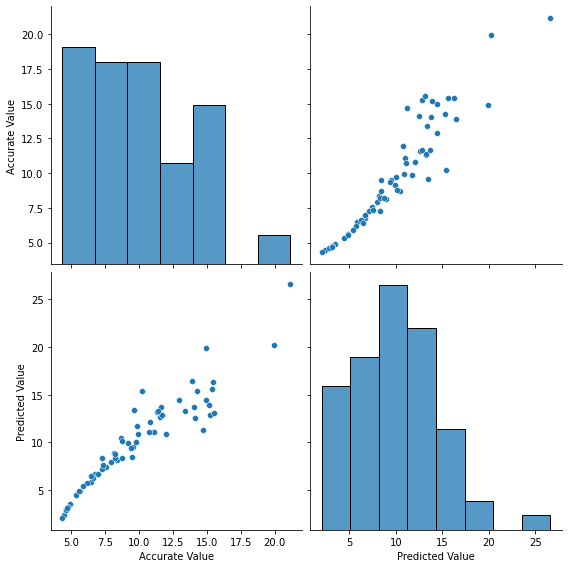

In [18]:
df2 = pd.DataFrame(predictions,y_test, columns={"Accurate Value"})
df2['Predicted Value'] = y_test
df2.index = np.arange(1,X_test.size+1,1)
sns.pairplot(df2, height= 4)

In [19]:
df2.head(3)

,Accurate Value,Predicted Value
1,14.047982,13.744490
2,9.526432,9.491623
3,11.638689,13.671109


In [20]:
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
r2_score(y_test,predictions)

0.865505357579791

In [22]:
mean_squared_error(y_test,predictions)

3.017392643033328

### Prediction using ANN

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [116]:
model = Sequential()
model.add(Dense(1))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1))
model.compile(optimizer= Adam(learning_rate=0.001), loss= "mse" )

In [117]:
from keras_tuner import RandomSearch, Hyperband
from keras_tuner import HyperParameters

In [118]:
# tuner_search = RandomSearch(model,objective= 'val_loss')

In [119]:
model.fit(X_train,y_train,batch_size=16,epochs= 1000, validation_data= (X_test,y_test))

Epoch 1/1000
16/16 [==============================] - 1s 9ms/step - loss: 10.4824 - val_loss: 5.9619
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 8.5289 - val_loss: 6.2192
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 7.6703 - val_loss: 5.4162
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 7.6690 - val_loss: 5.5803
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 7.5670 - val_loss: 5.5197
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 7.3714 - val_loss: 5.3503
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 7.0769 - val_loss: 5.1324
Epoch 8/1000
16/16 [==============================] - 0s 3ms/step - loss: 7.0675 - val_loss: 5.3400
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 6.9710 - val_loss: 4.9598
Epoch 10/1000
16/16 [==============================] - 0s 3ms/step - loss: 6.8975 - val_loss: 4.735

16/16 [==============================] - 0s 3ms/step - loss: 3.1511 - val_loss: 2.6775
Epoch 83/1000
16/16 [==============================] - 0s 3ms/step - loss: 3.2723 - val_loss: 2.4096
Epoch 84/1000
16/16 [==============================] - 0s 3ms/step - loss: 3.0679 - val_loss: 3.1102
Epoch 85/1000
16/16 [==============================] - 0s 3ms/step - loss: 3.0811 - val_loss: 2.5080
Epoch 86/1000
16/16 [==============================] - 0s 3ms/step - loss: 3.2176 - val_loss: 2.4370
Epoch 87/1000
16/16 [==============================] - 0s 3ms/step - loss: 3.2594 - val_loss: 3.1028
Epoch 88/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.9739 - val_loss: 2.4431
Epoch 89/1000
16/16 [==============================] - 0s 3ms/step - loss: 3.0180 - val_loss: 3.0193
Epoch 90/1000
16/16 [==============================] - 0s 3ms/step - loss: 3.2431 - val_loss: 3.0079
Epoch 91/1000
16/16 [==============================] - 0s 3ms/step - loss: 3.2877 - val_loss: 2.9925
Epoc

16/16 [==============================] - 0s 3ms/step - loss: 2.7644 - val_loss: 2.4538
Epoch 163/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.6992 - val_loss: 3.0204
Epoch 164/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.8783 - val_loss: 2.3782
Epoch 165/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.8045 - val_loss: 2.6500
Epoch 166/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.8380 - val_loss: 2.4648
Epoch 167/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.8217 - val_loss: 3.1453
Epoch 168/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.8204 - val_loss: 2.4362
Epoch 169/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.9135 - val_loss: 2.3955
Epoch 170/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.8812 - val_loss: 2.9895
Epoch 171/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.8048 - val_loss: 2.

16/16 [==============================] - 0s 3ms/step - loss: 2.8752 - val_loss: 2.4303
Epoch 243/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.9599 - val_loss: 2.6007
Epoch 244/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7334 - val_loss: 2.7854
Epoch 245/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7635 - val_loss: 2.5933
Epoch 246/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7620 - val_loss: 2.5147
Epoch 247/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.8277 - val_loss: 2.7163
Epoch 248/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.8016 - val_loss: 2.3884
Epoch 249/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7698 - val_loss: 2.7817
Epoch 250/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7267 - val_loss: 2.4650
Epoch 251/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7135 - val_loss: 2.

16/16 [==============================] - 0s 3ms/step - loss: 2.7275 - val_loss: 2.4528
Epoch 323/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7348 - val_loss: 2.6439
Epoch 324/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7353 - val_loss: 2.4296
Epoch 325/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7433 - val_loss: 2.5602
Epoch 326/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.6908 - val_loss: 2.5159
Epoch 327/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.8249 - val_loss: 2.4217
Epoch 328/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.6888 - val_loss: 2.5469
Epoch 329/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.6713 - val_loss: 2.5437
Epoch 330/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7026 - val_loss: 2.4078
Epoch 331/1000
16/16 [==============================] - 0s 3ms/step - loss: 2.7054 - val_loss: 2.

16/16 [==============================] - 0s 17ms/step - loss: 2.7783 - val_loss: 2.8170
Epoch 403/1000
16/16 [==============================] - 0s 21ms/step - loss: 2.7661 - val_loss: 2.6317
Epoch 404/1000
16/16 [==============================] - 0s 20ms/step - loss: 2.7725 - val_loss: 2.4597
Epoch 405/1000
16/16 [==============================] - 0s 16ms/step - loss: 2.7448 - val_loss: 2.5804
Epoch 406/1000
16/16 [==============================] - 0s 14ms/step - loss: 2.8023 - val_loss: 2.4233
Epoch 407/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.8090 - val_loss: 2.5147
Epoch 408/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.8475 - val_loss: 2.9621
Epoch 409/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.8200 - val_loss: 2.3665
Epoch 410/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7460 - val_loss: 2.5136
Epoch 411/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7383 - val_lo

16/16 [==============================] - 0s 5ms/step - loss: 2.7949 - val_loss: 2.4072
Epoch 483/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7140 - val_loss: 2.7660
Epoch 484/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7912 - val_loss: 2.3742
Epoch 485/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7703 - val_loss: 2.9587
Epoch 486/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.8264 - val_loss: 2.4681
Epoch 487/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7726 - val_loss: 2.6011
Epoch 488/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6914 - val_loss: 2.4485
Epoch 489/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6991 - val_loss: 2.5132
Epoch 490/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6956 - val_loss: 2.4479
Epoch 491/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7269 - val_loss: 2.

16/16 [==============================] - 0s 4ms/step - loss: 2.6822 - val_loss: 2.4092
Epoch 563/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6834 - val_loss: 2.6502
Epoch 564/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7490 - val_loss: 2.4220
Epoch 565/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.7775 - val_loss: 2.6426
Epoch 566/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7374 - val_loss: 2.4161
Epoch 567/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7691 - val_loss: 2.8693
Epoch 568/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7574 - val_loss: 2.4086
Epoch 569/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6894 - val_loss: 2.7637
Epoch 570/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7493 - val_loss: 2.4827
Epoch 571/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7619 - val_loss: 2.

16/16 [==============================] - 0s 6ms/step - loss: 2.8197 - val_loss: 2.4615
Epoch 643/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7716 - val_loss: 2.4922
Epoch 644/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6617 - val_loss: 2.6677
Epoch 645/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7294 - val_loss: 2.6523
Epoch 646/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7156 - val_loss: 2.6244
Epoch 647/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6995 - val_loss: 2.5709
Epoch 648/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7004 - val_loss: 2.4100
Epoch 649/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6824 - val_loss: 2.6863
Epoch 650/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.8973 - val_loss: 2.3929
Epoch 651/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.7701 - val_loss: 2.

16/16 [==============================] - 0s 5ms/step - loss: 2.9683 - val_loss: 2.4591
Epoch 723/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7851 - val_loss: 2.8985
Epoch 724/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7119 - val_loss: 2.4617
Epoch 725/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7213 - val_loss: 2.8614
Epoch 726/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6973 - val_loss: 2.4723
Epoch 727/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7200 - val_loss: 2.5552
Epoch 728/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7868 - val_loss: 2.4474
Epoch 729/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.8034 - val_loss: 2.8537
Epoch 730/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.8424 - val_loss: 2.4225
Epoch 731/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7399 - val_loss: 2.

16/16 [==============================] - 0s 4ms/step - loss: 2.7463 - val_loss: 2.6427
Epoch 803/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7304 - val_loss: 2.5853
Epoch 804/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7047 - val_loss: 2.6469
Epoch 805/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7376 - val_loss: 2.3955
Epoch 806/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6759 - val_loss: 2.6934
Epoch 807/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7254 - val_loss: 2.5422
Epoch 808/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6773 - val_loss: 2.5240
Epoch 809/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7304 - val_loss: 2.4691
Epoch 810/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7078 - val_loss: 2.6019
Epoch 811/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6759 - val_loss: 2.

16/16 [==============================] - 0s 6ms/step - loss: 3.1156 - val_loss: 2.4423
Epoch 883/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7865 - val_loss: 2.5352
Epoch 884/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6847 - val_loss: 2.5841
Epoch 885/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6604 - val_loss: 2.5722
Epoch 886/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6688 - val_loss: 2.4773
Epoch 887/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7765 - val_loss: 3.0270
Epoch 888/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7860 - val_loss: 2.4612
Epoch 889/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6751 - val_loss: 2.8314
Epoch 890/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.8261 - val_loss: 2.4289
Epoch 891/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.6964 - val_loss: 2.

16/16 [==============================] - 0s 4ms/step - loss: 2.7108 - val_loss: 2.6575
Epoch 963/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7627 - val_loss: 2.4649
Epoch 964/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7494 - val_loss: 2.4627
Epoch 965/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7456 - val_loss: 2.5927
Epoch 966/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.7250 - val_loss: 2.5413
Epoch 967/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6774 - val_loss: 2.5791
Epoch 968/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6469 - val_loss: 2.4421
Epoch 969/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6729 - val_loss: 2.6234
Epoch 970/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6911 - val_loss: 2.4660
Epoch 971/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.6783 - val_loss: 2.

In [120]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [121]:
predictions.T

array([[13.931581 , 10.304735 , 12.230229 ,  8.143553 ,  3.3023305,
         2.2863498, 11.624268 ,  6.5998497, 13.815049 ,  7.658389 ,
         9.819572 ,  2.7552633, 11.228063 ,  7.261436 , 12.46329  ,
         2.677112 ,  6.1930733,  9.202091 ,  2.9897213,  2.0177069,
        10.392948 ,  5.779196 , 14.094725 , 18.455599 ,  8.761034 ,
        19.400196 ,  5.0434127,  2.9115686, 10.260632 ,  8.4964   ,
         7.3055425, 14.584153 , 14.0015   , 14.397704 , 10.745794 ,
        14.887135 ,  9.246197 ,  7.3496485, 13.139171 , 11.834023 ,
        10.613478 , 12.183617 ,  4.4080176,  4.95144  ,  8.540504 ,
        14.723989 ,  6.423005 , 10.128313 , 11.600963 ,  9.290303 ,
        14.770604 , 14.537542 , 10.878113 , 12.253535 , 14.980358 ,
        14.9104395,  6.147087 , 12.020473 ,  6.9085903,  8.584611 ,
        12.04378  ,  5.411304 , 13.488763 ]], dtype=float32)

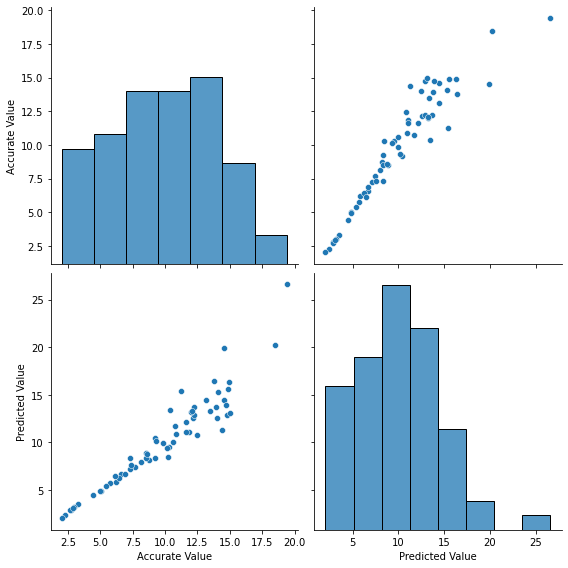

In [122]:
df2 = pd.DataFrame(predictions,y_test, columns={"Accurate Value"})
df2['Predicted Value'] = y_test
df2.index = np.arange(1,X_test.size+1,1)
sns.pairplot(df2, height = 4)

In [123]:
r2_score(y_test,predictions)

0.8840744024997826

In [124]:
mean_squared_error(y_test,predictions)

2.6007953829381596

### Using Random Search to improve ANN

In [33]:
import keras_tuner as kt
import tensorflow as tf

In [34]:

def build_model(hp):
  model = tf.keras.Sequential()
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units1, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='linear'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss="mse",
  )

  return model

In [46]:

tuner = RandomSearch(build_model,
  objective='val_loss',
  max_trials= 40,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='fashion_mnist',
  overwrite=True
)
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

Trial 40 Complete [00h 00m 16s]
val_loss: 7.740474224090576

Best val_loss So Far: 2.3072330951690674
Total elapsed time: 00h 09m 05s
INFO:tensorflow:Oracle triggered exit


In [125]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [126]:
from tensorflow.keras.callbacks import EarlyStopping

In [127]:
early_stop = EarlyStopping(monitor="val_loss", patience= 15, mode= "auto")

In [134]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
7/7 [==============================] - 1s 24ms/step - loss: 790.8119 - val_loss: 25.9789
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 18.5129 - val_loss: 21.9271
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 16.9388 - val_loss: 7.9231
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 8.4205 - val_loss: 11.8962
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 10.4697 - val_loss: 8.1780
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 11.7527 - val_loss: 9.2554
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 8.4893 - val_loss: 6.7558
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 6.2971 - val_loss: 8.5128
Epoch 9/200
7/7 [==============================] - 0s 13ms/step - loss: 7.9304 - val_loss: 5.9090
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 6.3900 - val_loss: 5.8322
Epoch 11/200
7/7

7/7 [==============================] - 0s 14ms/step - loss: 3.6657 - val_loss: 4.6363
Epoch 85/200
7/7 [==============================] - 0s 9ms/step - loss: 4.8203 - val_loss: 2.1146
Epoch 86/200
7/7 [==============================] - 0s 9ms/step - loss: 6.3478 - val_loss: 4.6542
Epoch 87/200
7/7 [==============================] - 0s 10ms/step - loss: 5.7628 - val_loss: 3.4015
Epoch 88/200
7/7 [==============================] - 0s 12ms/step - loss: 8.2993 - val_loss: 3.0269
Epoch 89/200
7/7 [==============================] - 0s 9ms/step - loss: 3.9990 - val_loss: 2.5215
Epoch 90/200
7/7 [==============================] - 0s 9ms/step - loss: 3.2551 - val_loss: 2.2764
Epoch 91/200
7/7 [==============================] - 0s 8ms/step - loss: 3.2030 - val_loss: 2.8278
Epoch 92/200
7/7 [==============================] - 0s 8ms/step - loss: 3.4580 - val_loss: 2.3130
Epoch 93/200
7/7 [==============================] - 0s 8ms/step - loss: 3.3677 - val_loss: 2.1035
Epoch 94/200
7/7 [============

Epoch 167/200
7/7 [==============================] - 0s 10ms/step - loss: 3.1579 - val_loss: 1.6885
Epoch 168/200
7/7 [==============================] - 0s 9ms/step - loss: 3.1862 - val_loss: 1.8853
Epoch 169/200
7/7 [==============================] - 0s 9ms/step - loss: 3.6822 - val_loss: 3.7122
Epoch 170/200
7/7 [==============================] - 0s 8ms/step - loss: 4.0946 - val_loss: 1.9226
Epoch 171/200
7/7 [==============================] - 0s 9ms/step - loss: 3.0687 - val_loss: 2.3165
Epoch 172/200
7/7 [==============================] - 0s 8ms/step - loss: 3.2979 - val_loss: 1.5818
Epoch 173/200
7/7 [==============================] - 0s 8ms/step - loss: 2.9626 - val_loss: 1.6740
Epoch 174/200
7/7 [==============================] - 0s 8ms/step - loss: 2.9649 - val_loss: 1.5934
Epoch 175/200
7/7 [==============================] - 0s 8ms/step - loss: 3.1692 - val_loss: 2.3988
Epoch 176/200
7/7 [==============================] - 0s 9ms/step - loss: 3.5362 - val_loss: 1.6042
Epoch 177

In [135]:
predictions = model.predict(X_test)


2/2 [==============================] - 0s 4ms/step


0.8897972482286531


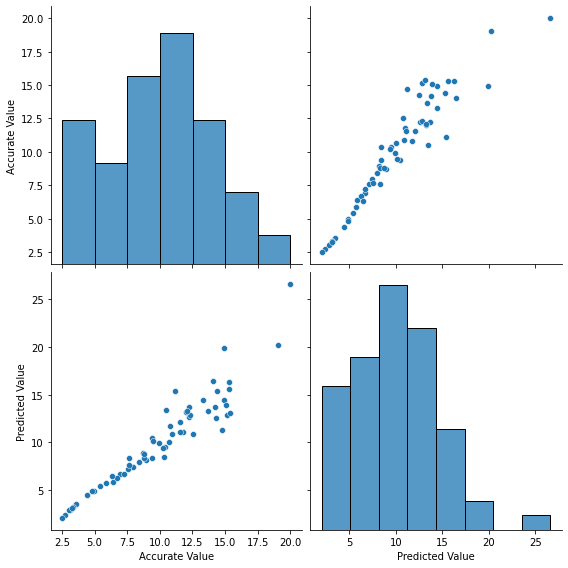

In [136]:
print(r2_score(y_test,predictions))
df2 = pd.DataFrame(predictions,y_test, columns={"Accurate Value"})
df2['Predicted Value'] = y_test
df2.index = np.arange(1,X_test.size+1,1)
sns.pairplot(df2, height = 4)